In [45]:
import numpy as np

In [46]:
import math
from scipy.stats import norm

class blackscholesmodel:
    def __init__(self, spot_price, strike_price, time_to_maturity, risk_free_rate, volatility):
        self.S0 = spot_price  # Current stock price
        self.K = strike_price  # Strike price
        self.T = time_to_maturity  # Time to maturity (in years)
        self.r = risk_free_rate  # Risk-free interest rate
        self.sigma = volatility  # Volatility of the underlying asset

    def calculate_option_price(self, option_type='call'):
        d1 = (np.log(self.S0 / self.K) + (self.r + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
        d2 = d1 - self.sigma * np.sqrt(self.T)

        if option_type == 'call':
            option_price = self.S0 * norm.cdf(d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
        elif option_type == 'put':
            option_price = self.K * np.exp(-self.r * self.T) * norm.cdf(-d2) - self.S0 * norm.cdf(-d1)
        else:
            raise ValueError("Invalid option_type. Use 'call' or 'put'.")

        return option_price

In [60]:
BS=blackscholesmodel(100,105,1,0.05,0.2)

In [61]:
BS.calculate_option_price()

8.021352235143176

In [49]:
class binomialmodel :
    def __init__(self,r,T,K,S,sigma,option_type,n):
        self.T=T
        self.K = K
        self.S = S
        self.r = r
        self.sigma = sigma
        self.option_type = option_type
        self.n = n
    
    def binomial_pricing(self):
        dt = self.T / self.n
        u = np.exp(self.sigma * np.sqrt(dt))
        d = 1 / u
        p = (np.exp(self.r * dt) - d) / (u - d)
        
        option_tree = np.zeros((self.n+1, self.n+1))
        stock_tree = np.zeros((self.n+1, self.n+1))
        
        for j in range(self.n+1):
            stock_tree[self.n, j] = self.S * (u ** j) * (d ** (self.n - j))
            option_tree[self.n, j] = max(0, self.option_type * (stock_tree[self.n, j] - self.K))
        
        for i in range(self.n - 1, -1, -1):
            for j in range(i + 1):
                stock_tree[i, j] = self.S * (u ** j) * (d ** (i - j))
                option_tree[i, j] = max(0, np.exp(-self.r * dt) * (p * option_tree[i+1, j] + (1-p) * option_tree[i+1, j+1]))
        
        return option_tree[0, 0],stock_tree,option_tree

In [50]:
PP=binomialmodel(0.03, 1, 105, 100, 0.2,1,4)

In [77]:
Rida=binomialmodel(0.06, 1, 100, 100, 0.3,1,4)

In [78]:
Rida.binomial_pricing()

(12.180695645539023,
 array([[100.        ,   0.        ,   0.        ,   0.        ,
           0.        ],
        [ 86.07079764, 116.18342427,   0.        ,   0.        ,
           0.        ],
        [ 74.08182207, 100.        , 134.98588076,   0.        ,
           0.        ],
        [ 63.76281516,  86.07079764, 116.18342427, 156.83121855,
           0.        ],
        [ 54.88116361,  74.08182207, 100.        , 134.98588076,
         182.21188004]]),
 array([[12.18069565,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 3.86885149, 21.3056541 ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  8.06032048, 35.90550739,  0.        ,  0.        ],
        [ 0.        ,  0.        , 16.79277854, 57.13288887,  0.        ],
        [ 0.        ,  0.        ,  0.        , 34.98588076, 82.21188004]]))

In [51]:
v0,Sm,om=PP.binomial_pricing()

In [52]:
v0

6.368714206136817

In [53]:
Sm,om

(array([[100.        ,   0.        ,   0.        ,   0.        ,
           0.        ],
        [ 90.4837418 , 110.51709181,   0.        ,   0.        ,
           0.        ],
        [ 81.87307531, 100.        , 122.14027582,   0.        ,
           0.        ],
        [ 74.08182207,  90.4837418 , 110.51709181, 134.98588076,
           0.        ],
        [ 67.0320046 ,  81.87307531, 100.        , 122.14027582,
         149.18246976]]),
 array([[ 6.36871421,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 1.94046175, 11.12427253,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  4.01121548, 18.77689022,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  8.29176337, 30.09411039,  0.        ],
        [ 0.        ,  0.        ,  0.        , 17.14027582, 44.18246976]]))

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class TrinomialTree:
    def __init__(self, matrix):
        self.G = nx.DiGraph()
        self.matrix = matrix
        self.labels = {}
        self.pos = None
        self.create_tree()
        self.set_node_labels()
    def create_tree(self):
        rows = len(self.matrix)
        for i in range(rows):
            for j in range(2*i+1):
                parent = (i, j)
                if i+1  < rows:
                    left_child = (i+1, j+2)
                    middle_child = (i+1, j+1)
                    right_child = (i+1, j)
                    self.G.add_edge(parent, right_child)
                    self.G.add_edge(parent, middle_child)
                    self.G.add_edge(parent, left_child)

    def set_node_labels(self):
        for node in self.G.nodes():
            i, j = node
            try:
                self.labels[node] ="$S_{"+str(i)+"}"+f"$={self.matrix[i][j]:.2f}"
            except Exception:
                self.labels[node] ='outofbound'

    def draw_tree(self):
        if self.pos is None:
            self.pos = nx.nx_pydot.graphviz_layout(self.G, prog='dot')

        pos_graphviz = {k: (-v[1], v[0]) for k, v in self.pos.items()}

        fig, ax = plt.subplots(figsize=(10, 5))

        nx.draw(self.G, pos_graphviz, with_labels=True, labels=self.labels, node_size=1000, node_color='skyblue', font_size=10, font_color='black')
        plt.show()

In [54]:
class trinomialmodel:
    def __init__(self,r,T,K,S,sigma,option_type,n):
        self.T=T
        self.K = K
        self.S = S
        self.r = r
        self.sigma = sigma
        self.option_type = option_type
        self.n = n
    
    def trinomial_pricing(self):
        dt = self.T / self.n
        u = np.exp(self.sigma * np.sqrt(2 * dt))
        d = 1 / u
        m = 1  # No change state
        p_u = (np.exp(self.r * dt / 2) - np.exp(-self.sigma * np.sqrt(dt / 2))) / (np.exp(self.sigma * np.sqrt(dt / 2)) - np.exp(-self.sigma * np.sqrt(dt / 2)))
        p_d = p_u 
        p_m = 1 - p_u - p_d  # Prob. of no change
        
        option_tree = np.zeros((self.n + 1, 2 * self.n + 1))
        stock_tree = np.zeros((self.n + 1, 2 * self.n + 1))

        for j in range(2 * self.n + 1):
            stock_tree[self.n, j] = self.S * (u ** (j - m)) * (d ** (self.n - j + m))
            option_tree[self.n, j] = max(0, self.option_type * (stock_tree[self.n, j] - self.K))
        
        for i in range(self.n - 1, -1, -1):
            for j in range(i + 1, 2 * i + 2):
                stock_tree[i, j] = stock_tree[i + 1, j] / u
                pv = np.exp(-self.r * dt) * (p_u * option_tree[i + 1, j - 1] +
                                             p_m * option_tree[i + 1, j] +
                                             p_d * option_tree[i + 1, j + 1])
                option_tree[i, j] = max(0, self.option_type * (stock_tree[i, j] - self.K) * pv)
        
        return option_tree[0, 0], stock_tree, option_tree


In [62]:
def tri(s, k, t, v, rf, cp, am=False, n=100,return_trees=False):
    """Price an option using the kamrad-ritchken binomial model.
    
    s : initial stock price
    k : strike price
    t : expiration time
    v : volatility
    rf : risk-free rate
    cp : +1/-1 for call/put
    am : True/False for American/European
    n : trinomial steps
    """
    #Basic calculations
    h = t/n
    mu=rf-v**2/2
    Lambda= math.sqrt(1/(1-1/3))
    alpha= math.sqrt(1+h*(mu/v)**2)
    u = np.exp(v*alpha*Lambda * np.sqrt(h))
    d = 1.0 / u
    drift = math.exp(rf*h)
    pu=1/(2*Lambda**2)+mu*np.sqrt(h)/(2*Lambda*v)
    pd=1/(2*Lambda**2)-mu*np.sqrt(h)/(2*Lambda*v)
    pm=1-1/Lambda**2

    #Process the terminal stock price
    stkval = np.zeros((n+1,2*n+1))
    optval = np.zeros((n+1,2*n+1))
    stkval[0,0] = s
    for i in range(n+1):
        for j in range(2*i + 1):
            stkval[i, j] = s * u**(i-j if (i>=j) else 0) * d**((j-i) if (i<j) else 0)

    #Backward recursion for option price
    for j in range(n+1):
        optval[n,j] = max(0,cp*(stkval[n,j]-k))
    for i in range(n-1,-1,-1):
        for j in range(2*i+1):
            optval[i,j] = (pu*optval[i+1,j]+pm*optval[i+1,j+1]+pd*optval[i+1,j+2]) /drift
            if am:
                optval[i,j] = max(optval[i,j],cp*(stkval[i,j]-k))
    if return_trees:
        return {"stock_tree":stkval,"option_tree":optval}
    return optval[0,0]

In [70]:
t=tri(100,105,1,0.2,0.03,1,True,4,True)
t

{'stock_tree': array([[100.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ],
        [113.03335368, 100.        ,  88.46946211,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ],
        [127.76539043, 113.03335368, 100.        ,  88.46946211,
          78.26845726,   0.        ,   0.        ,   0.        ,
           0.        ],
        [144.41750564, 127.76539043, 113.03335368, 100.        ,
          88.46946211,  78.26845726,  69.24368314,   0.        ,
           0.        ],
        [163.23994992, 144.41750564, 127.76539043, 113.03335368,
         100.        ,  88.46946211,  78.26845726,  69.24368314,
          61.25951402]]),
 'option_tree': array([[ 7.3370678 ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [13.98752275,  5.98765275,  1.8294697 ,  0.        ,  0

DiGraph with 0 nodes and 0 edges


C:\Users\admin\AppData\Local\Temp\ipykernel_3596\46119548.py:38: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='dot')


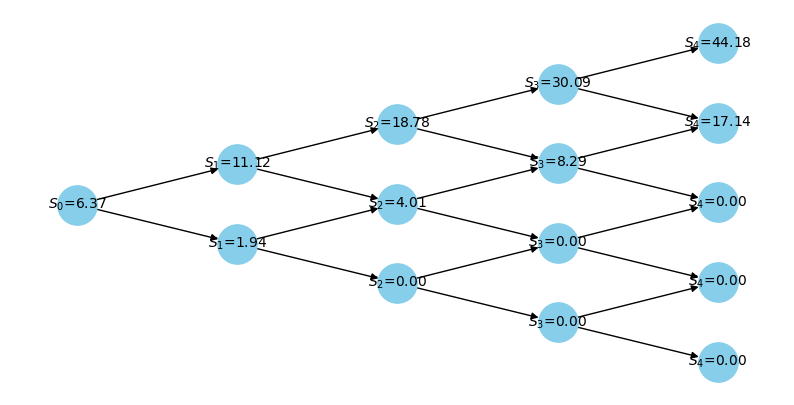

In [58]:
import networkx as nx
import matplotlib.pyplot as plt

def create_binomial_tree(matrix):
    G = nx.DiGraph()
    print(G)
    rows = len(matrix)
    for i in range(rows):
        for j in range(i+1):
            parent = (i, j)
            if i + 1 < rows:
                left_child = (i+1, j+1)
                right_child = (i+1, j)
                G.add_edge(parent, right_child)
                G.add_edge(parent, left_child)

    return G


def set_node_labels(G, matrix):
    labels = {}
    for node in G.nodes():
        i, j = node
        labels[node] ="$S_{"+str(i)+"}"+f"$={matrix[i][j]:.2f}"
    return labels


stock_vals=om

G = create_binomial_tree(stock_vals)
labels = set_node_labels(G, stock_vals)

# # Draw the tree
# pos = {(i,j): (j, -i) for i, j in G.nodes()}
# nx.draw(G, pos, with_labels=True, labels=labels, node_size=800, node_color='skyblue', font_size=10, font_color='black')
# plt.show()

pos = nx.nx_pydot.graphviz_layout(G, prog='dot')

pos_graphviz = {k: (-v[1], v[0]) for k, v in pos.items()}
# pos = nx.nx_pydot.graphviz_layout(G, prog="dot")
fig, ax = plt.subplots(figsize=(10, 5))

# Draw the tree
nx.draw(G, pos_graphviz, with_labels=True, labels=labels, node_size=800, node_color='skyblue', font_size=10, font_color='black')
plt.show()

DiGraph with 0 nodes and 0 edges


C:\Users\admin\AppData\Local\Temp\ipykernel_3596\1282881734.py:47: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='dot')


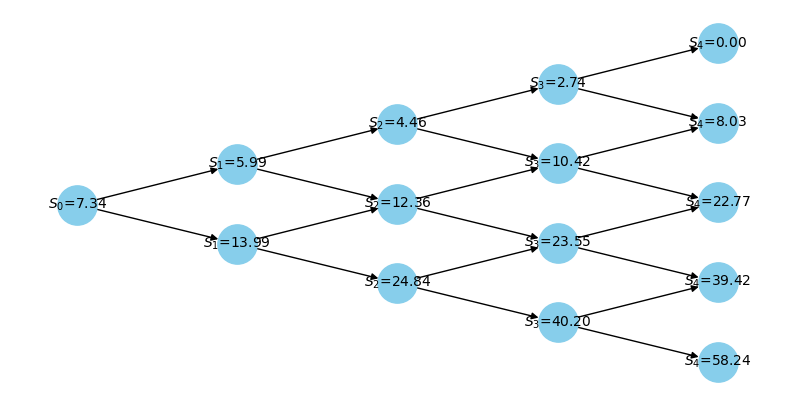

In [71]:
import networkx as nx
import matplotlib.pyplot as plt

def create_binomial_tree(matrix):
    G = nx.DiGraph()
    print(G)
    rows = len(matrix)
    for i in range(rows):
        for j in range(i+1):
            parent = (i, j)
            if i + 1 < rows:
                left_child = (i+1, j+1)
                right_child = (i+1, j)
                G.add_edge(parent, right_child)
                G.add_edge(parent, left_child)

    return G


def set_node_labels(G, matrix):
    labels = {}
    for node in G.nodes():
        i, j = node
        labels[node] ="$S_{"+str(i)+"}"+f"$={matrix[i][j]:.2f}"
    return labels


stock_vals=[[ 7.3370678 ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [13.98752275,  5.98765275,  1.8294697 ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [24.83993552, 12.35529015,  4.45921543,  0.93397646,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [40.2003731 , 23.54845239, 10.42015139,  2.73915375,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [58.23994992, 39.41750564, 22.76539043,  8.03335368,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ]]

G = create_binomial_tree(stock_vals)
labels = set_node_labels(G, stock_vals)

# # Draw the tree
# pos = {(i,j): (j, -i) for i, j in G.nodes()}
# nx.draw(G, pos, with_labels=True, labels=labels, node_size=800, node_color='skyblue', font_size=10, font_color='black')
# plt.show()

pos = nx.nx_pydot.graphviz_layout(G, prog='dot')

pos_graphviz = {k: (-v[1], v[0]) for k, v in pos.items()}
# pos = nx.nx_pydot.graphviz_layout(G, prog="dot")
fig, ax = plt.subplots(figsize=(10, 5))

# Draw the tree
nx.draw(G, pos_graphviz, with_labels=True, labels=labels, node_size=800, node_color='skyblue', font_size=10, font_color='black')
plt.show()